In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
import seaborn as sns
from sklearn.model_selection import cross_val_score


In [18]:
data_dir = "../dataset/heart_cleaned.csv"
df = pd.read_csv(data_dir)

In [19]:
features = ['cp','thalach', 'exang', 'oldpeak', 'ca']
target = 'target'

In [20]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [21]:
# Define the pipeline with scaling and logistic regression
pipeline = Pipeline(steps=[
    ('preprocessing', StandardScaler()),  # Default to StandardScaler
    ('classifier', LogisticRegression(max_iter=10000))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'preprocessing': [StandardScaler(), MinMaxScaler(), Normalizer(), None],  # Include different preprocessing methods
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__fit_intercept': [True, False],  # Whether to include intercept
}
# try using f1 instead of accuracy 
# look at the recall score too 
# formal cross validation k value decision 

# Perform grid search with cross-validatio     n
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters and best accuracy
print("Best parameters found: ", grid_search.best_params_)
print(f"Best f1 Score: {grid_search.best_score_:.2f}")

Best parameters found:  {'classifier__C': 0.1, 'classifier__fit_intercept': True, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'preprocessing': None}
Best f1 Score: 0.83


In [22]:
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Training set accuracy with best parameters: {train_accuracy:.2f}")

y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Test set accuracy with best parameters: {test_accuracy:.2f}")

print(classification_report(y_test, y_pred_test))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_test))

Training set accuracy with best parameters: 0.83
Test set accuracy with best parameters: 0.76
              precision    recall  f1-score   support

           0       0.73      0.61      0.67        18
           1       0.77      0.86      0.81        28

    accuracy                           0.76        46
   macro avg       0.75      0.73      0.74        46
weighted avg       0.76      0.76      0.76        46

[[11  7]
 [ 4 24]]


In [23]:
best_model = grid_search.best_estimator_

# Predictions on the training set
y_pred_train = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1_score = f1_score(y_train, y_pred_train)

print(f"Training set accuracy with best parameters: {train_accuracy:.2f}")
print(f"Training set precision with best parameters: {train_precision:.2f}")
print(f"Training set recall with best parameters: {train_recall:.2f}")
print(f"Training set F1 score with best parameters: {train_f1_score:.2f}")

# Predictions on the test set
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)

print(f"Test set accuracy with best parameters: {test_accuracy:.2f}")
print(f"Test set precision with best parameters: {test_precision:.2f}")
print(f"Test set recall with best parameters: {test_recall:.2f}")
print(f"Test set F1 score with best parameters: {test_f1_score:.2f}")

Training set accuracy with best parameters: 0.83
Training set precision with best parameters: 0.80
Training set recall with best parameters: 0.94
Training set F1 score with best parameters: 0.86
Test set accuracy with best parameters: 0.76
Test set precision with best parameters: 0.77
Test set recall with best parameters: 0.86
Test set F1 score with best parameters: 0.81


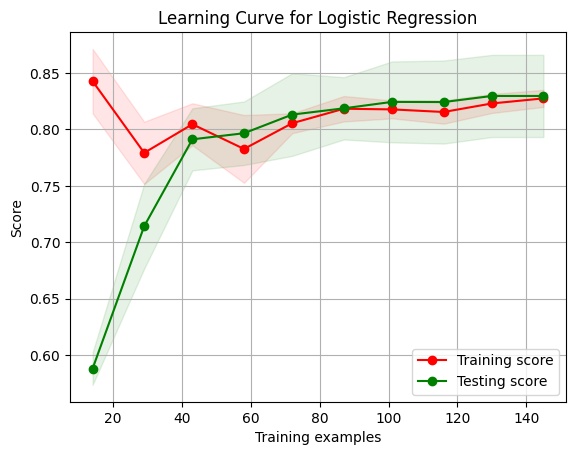

In [24]:

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Testing score")
    
    plt.legend(loc="best")
    return plt

# Plot the learning curve
title = "Learning Curve for Logistic Regression"
estimator = grid_search.best_estimator_
plot_learning_curve(estimator, title, X_train, y_train, cv=5)

# Show the plot
plt.show()


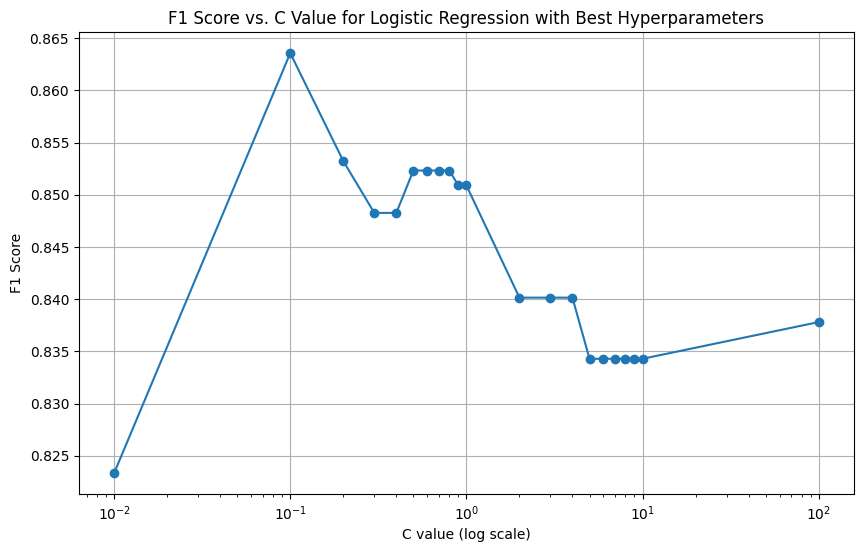

In [25]:
# Best parameters identified from hyperparameter tuning
best_params = {
    'classifier__fit_intercept': True,
    'classifier__penalty': 'l2',
    'classifier__solver': 'liblinear',
    'preprocessing': None  # None indicates no preprocessing
}

# Define the pipeline with the best preprocessing method and logistic regression
pipeline = Pipeline(steps=[
    ('classifier', LogisticRegression(max_iter=10000, 
                                      fit_intercept=best_params['classifier__fit_intercept'], 
                                      penalty=best_params['classifier__penalty'], 
                                      solver=best_params['classifier__solver']))
])

# Define the range of C values
C_values = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]

# Initialize lists to hold the mean F1 scores for each C value
f1_scores = []

# Perform cross-validation for each value of C
for C in C_values:
    # Update the classifier's C parameter
    pipeline.set_params(classifier__C=C)
    
    # If a preprocessing step is defined, add it to the pipeline
    if best_params['preprocessing'] is not None:
        pipeline.steps.insert(0, ('preprocessing', best_params['preprocessing']))
    
    # Compute the cross-validated F1 score
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
    
    # Remove the preprocessing step if it was added
    if best_params['preprocessing'] is not None:
        pipeline.steps.pop(0)
    
    # Append the mean score to the list
    f1_scores.append(np.mean(scores))

# Plot the F1 scores against the C values
plt.figure(figsize=(10, 6))
plt.plot(C_values, f1_scores, marker='o')
plt.xscale('log')
plt.xlabel('C value (log scale)')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. C Value for Logistic Regression with Best Hyperparameters')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


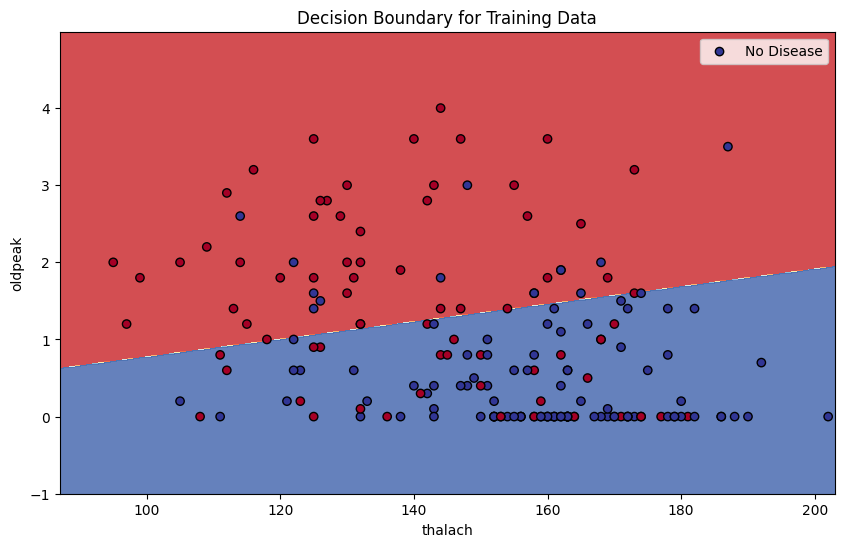

/var/folders/6s/_6zmz38j6qs40z7htdgb3pkw0000gn/T/ipykernel_3705/2505578745.py:38: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[features[0]], X_test[features[1]], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.RdYlBu, label='No Disease')


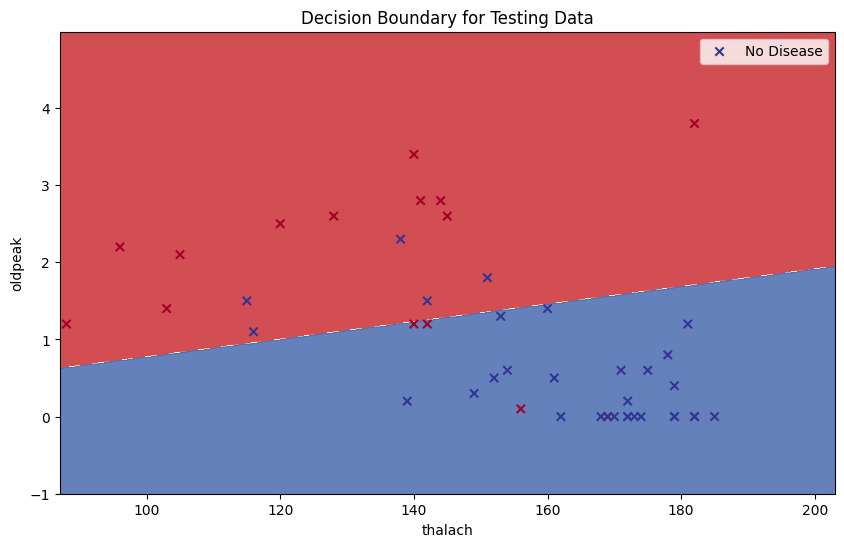

In [27]:
# Define the specific features you want to use
features = ['thalach', 'oldpeak']
X = df[features]
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline with scaling and logistic regression
pipeline = estimator

# Train the model
pipeline.fit(X_train, y_train)

# Create a mesh to plot the decision boundary
x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the mesh grid
Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting for the training data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train[features[0]], X_train[features[1]], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdYlBu, label='No Disease')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Decision Boundary for Training Data')
plt.legend()
plt.show()

# Plotting for the testing data
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_test[features[0]], X_test[features[1]], c=y_test, edgecolors='k', marker='x', cmap=plt.cm.RdYlBu, label='No Disease')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('Decision Boundary for Testing Data')
plt.legend()
plt.show()